#Project14 - To use Grid Search CV and Cross Validation in order to achieve high accuracy score to get better predictions.

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Here we are using Titanic dataset for this project to perform Cross validation and Grid Serch CV
titanic=pd.read_csv('titans.csv')
titanic     

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
titanic.keys()

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [4]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

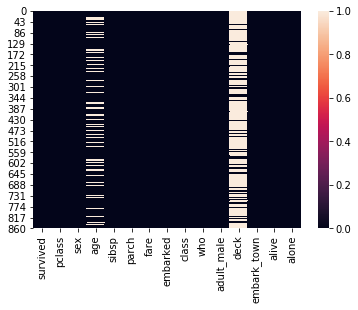

In [6]:
# To check null values via heat map plot
sns.heatmap(titanic.isnull())

In [7]:
# We can replace or remove these null values

titanic['age'].replace(np.NaN,titanic['age'].mean(),inplace=True)

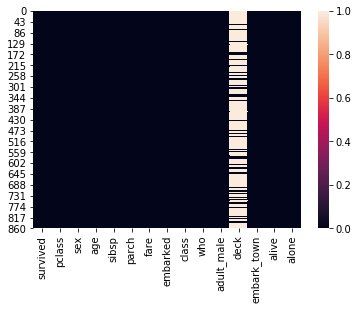

In [8]:
sns.heatmap(titanic.isnull())

In [9]:
# most of the data in 'deck' is missing so we can drop it 
titanic.drop(['deck'],axis=1,inplace=True)

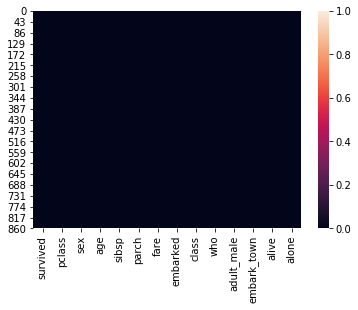

In [10]:
sns.heatmap(titanic.isnull())

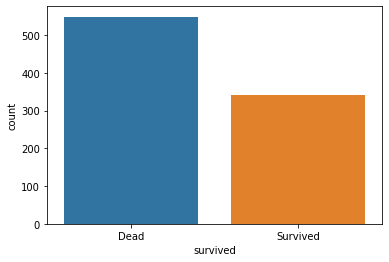

Dead        549
Survived    342
Name: survived, dtype: int64

In [12]:
count=titanic['survived'].apply(lambda x:"Survived" if x ==1 else'Dead')
sns.countplot(count)
plt.show()
count.value_counts()


In [18]:
# In this data set we need encryption as data is not in the form of string/numbers

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=['sex','embarked','class','who','adult_male','embark_town','alive','alone']
for val in list:
    titanic[val]=le.fit_transform(titanic[val].astype(str))

In [19]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,1,2,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,2,0,0,1,0
2,1,3,0,26.0,0,0,7.9250,2,2,2,0,2,1,1
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,2,1,0
4,0,3,1,35.0,0,0,8.0500,2,2,1,1,2,0,1


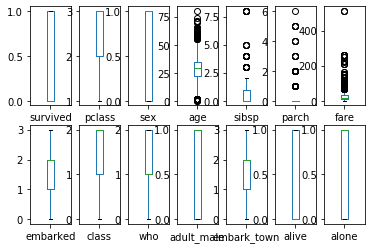

In [20]:
titanic.plot(kind='box',subplots=True, layout=(2,7))
plt.show()

We can see that there are outliers which we have to treat

In [21]:
#Removing outliers
from scipy.stats import zscore
z_score=np.abs(zscore(titanic))
print(titanic.shape)
tit_new=titanic[(z_score<3).all(axis=1)]
tit_new.shape

(891, 14)


(820, 14)

We can see that outliers are removed now

In [22]:
# Separating input and output data
df_x=titanic.iloc[:,1:8]
y=titanic.iloc[:,0]

In [23]:
#Checking for skewness
print(df_x.skew())
print('Total no. of features are: ', len(df_x.skew()) )
print('No. of Skewed features are: ', len(df_x.skew().loc[abs(df_x.skew())>0.5]))


pclass     -0.630548
sex        -0.618921
age         0.434488
sibsp       3.695352
parch       2.749117
fare        4.787317
embarked   -1.246689
dtype: float64
Total no. of features are:  7
No. of Skewed features are:  6


In [24]:
# Removing Skewness
for index in df_x.skew().index:
    if df_x.skew().loc[index]>0.5:
        df_x[index]=np.log1p(df_x[index])
    if df_x.skew().loc[index]<-0.5:
        df_x[index]=np.square(df_x[index])

In [25]:
#Again Checking for skewness
print(df_x.skew())
print('Total no of features are : ', len(df_x.skew()))
print('No of skewed features are : ',len(df_x.skew().loc[abs(df_x.skew())>0.5]))

pclass     -0.444064
sex        -0.618921
age         0.434488
sibsp       1.661245
parch       1.675439
fare        0.394928
embarked   -0.950296
dtype: float64
Total no of features are :  7
No of skewed features are :  4


In [26]:
#Using standard scalar method to Normalize our data or to bring all variable to common scale
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [27]:
#Again Checking for skewness after Scaling
print(x.skew())
print("Total features: ",len(x.skew()))
print("Skewed features: ",len(x.skew().loc[abs(x.skew())>0.5]))

pclass     -0.444064
sex        -0.618921
age         0.434488
sibsp       1.661245
parch       1.675439
fare        0.394928
embarked   -0.950296
dtype: float64
Total features:  7
Skewed features:  4


Now we have data ready to train our model using different method we have to use Grid search CV and cross validation in this dataset

First we build a Dummy Classifier to determine the ‘baseline’ performance , this helps in What would be the success rate of the model, if one were simply guessing

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [29]:
#Using Dummy Classifier
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy= 'most_frequent').fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [30]:
#Distribution of y test
print('y actual : \n' +  str(y_test.value_counts()))

#Distribution of y predicted
print('y predicted : \n' + str(pd.Series(y_pred).value_counts()))

y actual : 
0    134
1     89
Name: survived, dtype: int64
y predicted : 
0    223
dtype: int64


From the output, we can observe that there are 134 dead and 89 alive cases in the test dataset. But our classifier predicts all cases as dead (as it is the majority class).

In [33]:
# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.600896860986547
Precision Score : 0.0
Recall Score : 0.0
F1 Score : 0.0
Confusion Matrix : 
[[134   0]
 [ 89   0]]


Now we try this by using Decision Tree Classifier

In [38]:
#Training model using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train,y_train)
y_pred = clf.predict(X_test)

# Model Evaluation metrics
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.7399103139013453
Precision Score : 0.6741573033707865
Recall Score : 0.6741573033707865
F1 Score : 0.6741573033707865
Confusion Matrix : 
[[105  29]
 [ 29  60]]


**We can see that here we are getting 73% accuracy and 67% Precision and Recall scores, By confusion Matrix we can see that 29 are Flase 
Negative and 29 are false Positive**




Now we will try Grid Search CV to get best hyperparamets for our Decision Tree Classifier in order to achieve more accuracy

In [39]:
#Using Grid Search CV
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier()
parameters = {'criterion': ['gini', 'entropy',],
              'splitter':['best', 'random'],'random_state':range(42,101),
             'max_depth':[None,2,5,10,15,20],'min_samples_split':[2,5,10,15,20],}
grid_clf_acc = GridSearchCV(clf, param_grid = parameters,scoring = 'precision')
grid_clf_acc.fit(X_train, y_train)
grid_clf_acc.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_split': 5,
 'random_state': 46,
 'splitter': 'random'}

We can see that these are the best parameters we get, we use them in our Decision Tree classier and will see the results

In [42]:
#Applying best hyperparameters to our model
clf = DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=5,random_state=46,min_samples_split=5).fit(X_train,y_train)
y_pred = clf.predict(X_test)

# Model Evaluation metrics
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.8071748878923767
Precision Score : 0.7875
Recall Score : 0.7078651685393258
F1 Score : 0.7455621301775148
Confusion Matrix : 
[[117  17]
 [ 26  63]]


We can see that a considerable improvement in our accuaracy, precision and recall score 

**Our accuracy has been improved from 73& earlier to 81% now and for precision 67% earlier and 71% now**

We can say that Grid Search CV really helps in getting best parameters for a technique to get more accuracy







.

**Now we perform cross validation**- cross validation technique divides the data sets into number of partitions/folds and perform operations on each partition and gives the resultant of accuracy score

In [46]:
from sklearn.model_selection import cross_val_score
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)

In [49]:
c_scores=cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy').mean()
# Model Evaluation metrics
print('Cross Value Accuracy = ', c_scores)

Cross Value Accuracy =  0.7846146861877199


**We can see that cross validation imporved the accuracy score form 73% earlier to the 78% now**

In [54]:
#Cross Validation + Grid Search CV
c_scores=cross_val_score(DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=5,random_state=46,min_samples_split=5),x,y,cv=50,scoring='accuracy').mean()
# Model Evaluation metrics
print('Cross Value Accuracy = ', c_scores)

Cross Value Accuracy =  0.8129901960784315


We can see that we are able to achieve an accuracy score of around 82% by using cross validation and Grid search CV